# Figures for "Core physical principles of allostery"

### Eric Rouviere, Olivier Rivoire, Rama Ranganathan, 2026.


In [1]:
# Load the code in the package `UnificationAllostery`
using Pkg
Pkg.activate("./UnificationAllostery")
Pkg.instantiate()

using Revise, LinearAlgebra, PyPlot, LaTeXStrings
using SpecialFunctions, Statistics, BenchmarkTools, Printf, JLD2, PyCall
@pyimport mpl_toolkits.axes_grid1 as ag
using UnificationAllostery

  Activating project at `~/Dropbox/protevo/my_papers/P2_unification_allostery/biophysj_submission/Rouviere_2026_BiophysJ/UnificationAllostery`


## Figure 2. Quadratic models

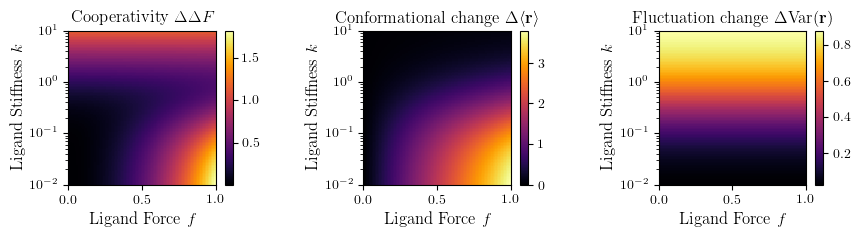

In [2]:
λ = 0.5
β = 1
ua = [0.0, 0.9, 0.1, 0, 0]
ub = [0.0, 0.9, 0.0, 0.1, 0];
fmag = LinRange(0, 1, 100)
kmag = 10 .^ LinRange(-2,1, 100)

ddF = coopQuad.([ua], [ub], λ, β, fmag, fmag, kmag', kmag')'
dR = confChangeQuad.([ua], [ub], λ, β, fmag, fmag, kmag', kmag')'
dFl = fluctChangeQuad.([ua], [ub], λ, β, fmag, fmag, kmag', kmag')'

fs = 12
fig, axs = subplots(1,3, figsize=(10, 2))
fig.subplots_adjust(wspace = 0.6)

ax = axs[1]
p = ax.pcolor(fmag, kmag, ddF, cmap="inferno", linewidth=0, rasterized=true)
#ax.set_aspect("square")
ax.set_xlabel("Ligand Force  "*L"f", fontsize=fs)
ax.set_ylabel("Ligand Stiffness   "*L"k", fontsize=fs)
ax.set_yscale("log")
clb = fig.colorbar(p, ax=ax)
ax.set_title("Cooperativity   "*L"\Delta \Delta F", fontsize=fs)

ax = axs[2]
p = ax.pcolor(fmag, kmag, dR, cmap="inferno", linewidth=0, rasterized=true)
ax.set_xlabel("Ligand Force  "*L"f", fontsize=fs)
ax.set_ylabel("Ligand Stiffness   "*L"k", fontsize=fs)
ax.set_yscale("log")
clb = fig.colorbar(p, ax=ax)
ax.set_title("Conformational change "*L"\Delta \langle \mathbf{r} \rangle", fontsize=fs)

ax = axs[3]
p = ax.pcolor(fmag, kmag, abs.(dFl), cmap="inferno", linewidth=0, rasterized=true)
ax.set_xlabel("Ligand Force  "*L"f", fontsize=fs)
ax.set_ylabel("Ligand Stiffness   "*L"k", fontsize=fs)
ax.set_yscale("log")
clb = fig.colorbar(p, ax=ax)
ax.set_title("Fluctuation change "*L"\Delta \mathrm{Var}(\mathbf{r})", fontsize=fs)

fig.savefig("linear_model_force_stiffness.svg", bbox_inches="tight")

## Figure 3.1, The Bistable Switch

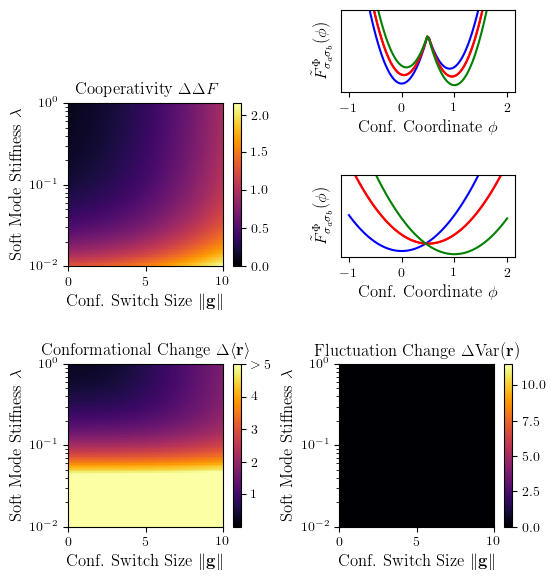

In [3]:
## Soft Mode, Added Spring.
β = 1
fa = 1
fb = 1
ua = [0.9, 0.1, 0.1, 0, 0]
ub = [0.9, 0.1, 0.0, 0.1, 0];
λ = 10 .^ LinRange(-2,0,100)
gmag = LinRange(0,10,100)
h = - (fa*ua + fb*ub) / 2;

ddF = coopBi.([h], [ua], [ub], λ', β, fa, fb, gmag)'
CC = confChangeBiApprox.([h],[ua], [ub], λ', β, fa, fb, gmag)'
FC = fluctChangeBiApprox.([h], [ua], [ub], λ', β, fa, fb, gmag)'

function plotter(ax, x, y, z,fs; title="", clbLabel="", vmax=maximum(z), vmin=0)
    p = ax.pcolor(x, y, z, cmap="inferno", linewidth=0, rasterized=true, vmax=vmax, vmin=0)
    ax.set_ylabel("Soft Mode Stiffness "*L"\lambda", fontsize=fs)
    ax.set_xlabel("Conf. Switch Size "*L"\Vert \mathbf{g} \Vert", fontsize=fs)
    ax.set_yscale("log")
    ax.set_title(title, fontsize=fs)
    clb = fig.colorbar(p, ax=ax)
    ax.set_title(clbLabel, fontsize=fs)
    return clb
end

fs = 12
fig, axs = subplots(2,2,figsize=(6, 5.5))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
plotter(axs[1,1], gmag, λ, ddF, fs; clbLabel="Cooperativity "*L"\Delta \Delta F")
clb = plotter(axs[2,1], gmag, λ, CC, fs, clbLabel="Conformational Change "*L"\Delta\langle\mathbf{r}\rangle", vmax=5)
plotter(axs[2,2], gmag, λ, FC, fs, clbLabel="Fluctuation Change "*L"\Delta\mathrm{Var}(\mathbf{r})", vmax=11.5)
axs[1,2].set_axis_off()
clb.set_ticks(1:5)
clb.set_ticklabels(["1","2","3","4",L">5"])


function plotLandscapes!(ax, y, U00, U10, U01, U11, fs)
    ax.plot(y, U00, c="b")
    ax.plot(y, U10, c="r")
    ax.plot(y, U01, c="r")
    ax.plot(y, U11, c="g")
    ax.set_xlabel("Conf. Coordinate "*L"\phi", fontsize=fs)
    ax.set_ylabel(L"\tilde{F}^{\Phi}_{\sigma_a \sigma_b}(\phi)", fontsize=fs)
    ax.set_yticks([])
end

left = 0.58
bottom = 0.9
width = 0.29
height = 0.15 
axa = fig.add_axes([left, bottom, width, height])

λ = 10
gmag = 10
U00, U10, U01, U11 = energyAlongConfChangeBi(h, ua, ub, λ, β, fa, fb, gmag);
y = LinRange(-1, 2, 100)
plotLandscapes!(axa, y, U00, U10, U01, U11, fs)
axa.set_ylim([-7, 3])

left = 0.58
bottom = 0.60
width = 0.29
height = 0.15
axb = fig.add_axes([left, bottom, width, height])

λ = 0.01
gmag = 0
U00, U10, U01, U11 = energyAlongConfChangeBi(h, ua, ub, λ, β, fa, fb, gmag);
y = LinRange(-1, 2, 100)
plotLandscapes!(axb, y, U00, U10, U01, U11, fs)
axb.set_ylim([-1, 5])

fig.savefig("bistable_model.svg", bbox_inches="tight")

## Figure 3.2: The order-disorder switch.

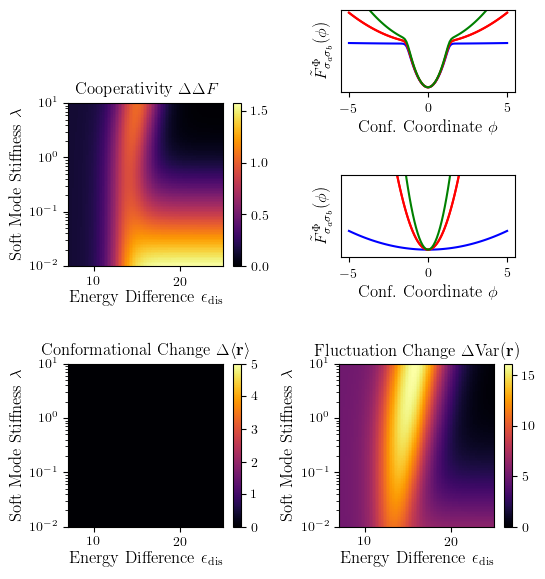

In [7]:
β = 1
ka = 1
kb = 1
ua = [0.0, 0.5, 0.5, 0, 0]
ub = [0.0, 0.5, 0.0, 0.5, 0];

ϵ = LinRange(7, 25, 100)
λ = 10 .^ LinRange(-2,1,100)

ddF = coopOD.([ua], [ub], λ', β, ka, kb, ϵ)'
CC = zeros(size(ddF))
FC = fluctChangeOD.([ua], [ub], λ', β, ka, kb, ϵ)'

function plotter(ax, x, y, z,fs; title="", clbLabel="", vmax=maximum(z), vmin=0)
    p = ax.pcolor(x, y, z, cmap="inferno", linewidth=0, rasterized=true, 
        vmax=vmax, vmin=vmin)
    ax.set_ylabel("Soft Mode Stiffness "*L"\lambda", fontsize=fs)
    ax.set_xlabel("Energy Difference "*L"\epsilon_{\rm dis}", fontsize=fs)
    ax.set_yscale("log")
    ax.set_title(title, fontsize=fs)
    clb = fig.colorbar(p, ax=ax)
    ax.set_title(clbLabel, fontsize=fs)
end

fs = 12
fig, axs = subplots(2,2,figsize=(6, 5.5))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
plotter(axs[1,1], ϵ, λ, ddF, fs, clbLabel="Cooperativity "*L"\Delta \Delta F")
plotter(axs[2,1], ϵ, λ, CC, fs, clbLabel="Conformational Change "*L"\Delta\langle\mathbf{r}\rangle", vmax=5)
plotter(axs[2,2], ϵ, λ, FC, fs, clbLabel="Fluctuation Change "*L"\Delta\mathrm{Var}(\mathbf{r})")
axs[1,2].set_axis_off()

function plotLandscapes!(ax, y, U00, U10, U01, U11, fs)
    ax.plot(y, U00, c="b")
    ax.plot(y, U10, c="r")
    ax.plot(y, U01, c="r")
    ax.plot(y, U11, c="g")
    ax.set_xlabel("Conf. Coordinate "*L"\phi", fontsize=fs)
    ax.set_ylabel(L"\tilde{F}^{\Phi}_{\sigma_a \sigma_b}(\phi)", fontsize=fs)
    ax.set_yticks([])
end


left = 0.58
bottom = 0.9
width = 0.29
height = 0.15 
axa = fig.add_axes([left, bottom, width, height])

ϵ = 9
λ = 10
U00, U10, U01, U11 = energyAlongConfCoorOD(ua, ub, λ, β, ka, kb, ϵ);
y = LinRange(-5, 5, 100)
plotLandscapes!(axa, y, U00, U10, U01, U11, fs)
axa.set_ylim([-1, 16])

left = 0.58
bottom = 0.60
width = 0.29
height = 0.15
axb = fig.add_axes([left, bottom, width, height])

λ = 0.02
ϵ = 20
U00, U10, U01, U11 = energyAlongConfCoorOD(ua, ub, λ, β, ka, kb, ϵ);
y = LinRange(-5, 5, 100)
plotLandscapes!(axb, y, U00, U10, U01, U11, fs)
axb.set_ylim([-0.1, 1])

fig.savefig("order_disorder_model.svg", bbox_inches="tight")

## MCMC Free energy landscapes
This cell will take 1-5 minutes to run

In [5]:
# simulate and save data
# Parameters ---------------------------------------------------------
dataDir = "./"
N = 5 # number of dimensions
β = 1.0 # inverse physical temperature
r0 = zeros(N) # initial configuration
λ_unfold = 0.01 # stiffness of the unfolded state.
n_iter = 1_000_000_00
γ = 1.2 # Metropolis conformation step size
β_mcmc = 1 # MCMC temperature
t_sample = 10 # sampling time.

# Induced Fit ---------------------------------------------------------
λ = 0.1
ua = [0.0, 0.5, 0.5, 0.0, 0]; normalize!(ua)
ub = [0.0, 0.5, 0.0, 0.5, 0]; normalize!(ub)
fa, fb, ka, kb = 0.5, 0.5, 0, 0;

H = Matrix{Float64}(I, N,N); H[2,2] = λ
H0, ϵ = λ_unfold * diagm(ones(N)) , 30 # Hessian and energy of unfolded state
g = zeros(N)
h = -0.5( fa*ua + fb*ub ) 

R00 = zeros(N) #confQuad(H, h)
ΔR = confQuad(H, h + fa*ua + fb*ub ) - confQuad(H, h)
confs1 = run_mcmc(n_iter, γ, β, t_sample, r0, H, H0, g, h, ϵ, β);
confs2 = run_mcmc(n_iter, γ, β, t_sample, r0, H, H0, g, h+fa*ua+fb*ub, ϵ, β);
Φ_vec1, Ψ_vec1 = computeΦΨFromConfs(confs1, ΔR, R00);
Φ_vec2, Ψ_vec2 = computeΦΨFromConfs(confs2, ΔR, R00);
save(dataDir*"data_4_MCMC_Surfaces_inducedFit.jld2",
    "Φ_vec1", Float16.(Φ_vec1),
    "Ψ_vec1", Float16.(Ψ_vec1),
    "Φ_vec2", Float16.(Φ_vec2),
    "Ψ_vec2", Float16.(Ψ_vec2))

# Conformational Switch---------------------------------------------------------
λ = 1
ua = [0.5, 0.0, 0.5, 0, 0]; normalize!(ua)
ub = [0.5, 0.0, 0.0, 0.5, 0]; normalize!(ub)
fa, fb, ka, kb = 0.5,0.5,0,0;

H = Matrix{Float64}(I, N,N); H[2,2] = λ
H0, ϵ = λ_unfold * diagm(ones(N)) , 30 # Hessian and energy of unfolded state
g = zeros(N); g[1] = 5
h = -0.5( fa*ua + fb*ub ) 

R00 = zeros(N) # confBiApprox(H, h, g, β)
ΔR = confBiApprox(H, h + fa*ua + fb*ub, g, β) - R00
confs1 = run_mcmc(n_iter, γ, β, t_sample, r0, H, H0, g, h, ϵ, β);
confs2 = run_mcmc(n_iter, γ, β, t_sample, r0, H, H0, g, h+fa*ua+fb*ub, ϵ, β);
Φ_vec1, Ψ_vec1 = computeΦΨFromConfs(confs1, ΔR, R00);
Φ_vec2, Ψ_vec2 = computeΦΨFromConfs(confs2, ΔR, R00);
save(dataDir*"data_4_MCMC_Surfaces_confSwitch.jld2",
    "Φ_vec1", Float16.(Φ_vec1),
    "Ψ_vec1", Float16.(Ψ_vec1),
    "Φ_vec2", Float16.(Φ_vec2),
    "Ψ_vec2", Float16.(Ψ_vec2))

# Dynamic---------------------------------------------------------
λ = 0.08
ua = [0.0, 0.5, 0.5, 0.0, 0]; normalize!(ua)
ub = [0.0, 0.5, 0.0, 0.5, 0]; normalize!(ub)
fa, fb, ka, kb = 0,0,0.5,0.5;

H = Matrix{Float64}(I, N,N); H[2,2] = λ
H0, ϵ = λ_unfold * diagm(ones(N)) , 30  # Hessian and energy of unfolded state
g = zeros(N)
h = zeros(N)

ΔH = ka*ua*ua' + kb*ub*ub'
h = -0.5( fa*ua + fb*ub ) 
R00 = zeros(N) # confBiApprox(H, h, g, β)
ΔR = zeros(N); ΔR[2] = 1 # soft mode
confs1 = run_mcmc(n_iter, γ, β, t_sample, r0, H, H0, g, h, ϵ, β);
confs2 = run_mcmc(n_iter, γ, β, t_sample, r0, H+ΔH, H0, g, h, ϵ, β);
Φ_vec1, Ψ_vec1 = computeΦΨFromConfs(confs1, ΔR, R00);
Φ_vec2, Ψ_vec2 = computeΦΨFromConfs(confs2, ΔR, R00);
save(dataDir*"data_4_MCMC_Surfaces_dynamic.jld2",
    "Φ_vec1", Float16.(Φ_vec1),
    "Ψ_vec1", Float16.(Ψ_vec1),
    "Φ_vec2", Float16.(Φ_vec2),
    "Ψ_vec2", Float16.(Ψ_vec2))


# Folding ---------------------------------------------------------
λ = 1.0
ua = [0.0, 0.0, 1.0, 0.0, 0]; normalize!(ua)
ub = [0.0, 0.0, 0.0, 1.0, 0]; normalize!(ub)
fa, fb, ka, kb = 0,0,0.5,0.5;

H = Matrix{Float64}(I, N,N); H[2,2] = λ
H0, ϵ = λ_unfold * diagm(ones(N)) , 12  # Hessian and energy of unfolded state
g = zeros(N)
h = zeros(N)

ΔH = ka*ua*ua' + kb*ub*ub'
R00 = zeros(N) # confBiApprox(H, h, g, β)
ΔR = zeros(N); ΔR[end] = 1 
r0 = zeros(N) 
confs1 = run_mcmc(n_iter, γ, β, t_sample, r0, H, H0, g, h, ϵ, β);
confs2 = run_mcmc(n_iter, γ, β, t_sample, r0, H+ΔH, H0+ΔH, g, h, ϵ, β);
Φ_vec1, Ψ_vec1 = computeΦΨFromConfs(confs1, ΔR, R00);
Φ_vec2, Ψ_vec2 = computeΦΨFromConfs(confs2, ΔR, R00);
save(dataDir*"data_4_MCMC_Surfaces_orderDisorder.jld2",
    "Φ_vec1", Float16.(Φ_vec1),
    "Ψ_vec1", Float16.(Ψ_vec1),
    "Φ_vec2", Float16.(Φ_vec2),
    "Ψ_vec2", Float16.(Ψ_vec2))

Fraction accepted: 0.28778422
Fraction accepted: 0.28769411
Fraction accepted: 0.23746089
Fraction accepted: 0.23732117
Fraction accepted: 0.28927425
Fraction accepted: 0.23862012
Fraction accepted: 0.48864954
Fraction accepted: 0.2104403


In [6]:
function plotLandscape(ax, Φ_vec, Ψ_vec;
                       xlim = [-20, 20],
                       ylim = [0, 20],
                       numBins = 80,
                       fs = 14,
                       showColorBar = true,
                       clb_label = L"\tilde{F}^{\Phi\Psi}_{\sigma_a \sigma_b}",
                       shrink_factor = 0.85)  # Controls subplot width for no colorbar

    x_edges = LinRange(xlim..., numBins+1)
    y_edges = LinRange(ylim..., numBins+1)
    x_plot = x_edges[1:end-1] .+ diff(xlim)[1] / numBins / 2
    y_plot = y_edges[1:end-1] 
    F = make_2d_FreeEnergy(Φ_vec, Ψ_vec, β, x_edges, y_edges)
    m, M = extrema(filter(!isnan, F))

    ct = ax.contourf(x_plot, y_plot, F, 20, cmap="inferno")

    # Add label inside the subplot (top-right corner)
    ax.text(0.96, 0.94, clb_label, transform=ax.transAxes,
            fontsize=14, fontweight="bold", ha="right", va="top")

    # Adjust subplot width if NO colorbar
    if !showColorBar
        pos = ax.get_position()
        ax.set_position([pos.x0, pos.y0, pos.width * shrink_factor, pos.height])
    end

    # If colorbar is required, place it separately
    if showColorBar
        fig = ax.figure
        cax = fig.add_axes([ax.get_position().x1 + 0.01,  # Right of subplot
                            ax.get_position().y0,         # Same Y position
                            0.01,                         # Fixed width
                            ax.get_position().height])    # Same height

        clb = fig.colorbar(ct, cax=cax)
        clb.set_ticks([m, M])
        clb.set_ticklabels([@sprintf("%.1f", m), @sprintf("%.1f", M)])
    end

    ax.set_yticklabels([])
end

plotLandscape (generic function with 1 method)

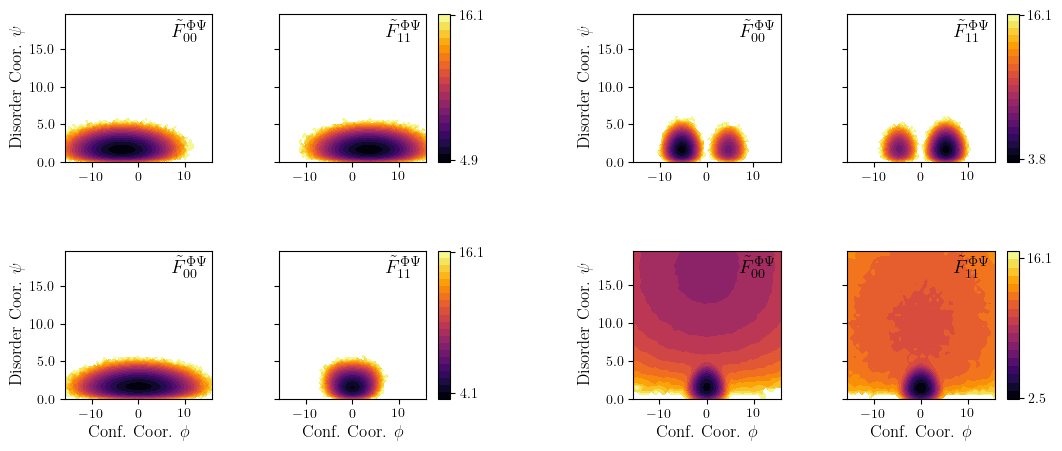

PyObject Text(0.5, 24.759410511363633, 'Conf. Coor. $\\phi$')

In [7]:
fig = figure(figsize=(12,5))
gs = fig.add_gridspec(2, 5, width_ratios=[1,1, 0.5, 1,1])  # Column 3 is for spacing
axs = [fig.add_subplot(gs[i, j]) for i in 1:2 for j in vcat(1:2, 4:5)]  # 8 elements
axs = reshape(axs, 2, 4)
fig.subplots_adjust(wspace=0.5, hspace=0.6)
# Initialize Figure ---------------------------------------------------------
# fig, axs = subplots(2,4, figsize=(12,5))
# fig.subplots_adjust(wspace=0.6, hspace=0.6)
fs = 12
xlim=[-16,16]
ylim=[0,20]


# Induced Fit ---------------------------------------------------------
D = load(dataDir*"data_4_MCMC_Surfaces_inducedFit.jld2")
Φ_vec1, Ψ_vec1, Φ_vec2, Ψ_vec2 = D["Φ_vec1"], D["Ψ_vec1"], D["Φ_vec2"], D["Ψ_vec2"]
plotLandscape(axs[1,1], Φ_vec1, Ψ_vec1; xlim, ylim, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{00}", showColorBar=false, shrink_factor=1)
plotLandscape(axs[2,1], Φ_vec2, Ψ_vec2; xlim, ylim, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{11}")

# Dynamic---------------------------------------------------------
D = load(dataDir*"data_4_MCMC_Surfaces_dynamic.jld2")
Φ_vec1, Ψ_vec1, Φ_vec2, Ψ_vec2 = D["Φ_vec1"], D["Ψ_vec1"], D["Φ_vec2"], D["Ψ_vec2"]
plotLandscape(axs[1,3], Φ_vec1, Ψ_vec1; xlim, ylim, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{00}", showColorBar=false, shrink_factor=1)
plotLandscape(axs[2,3], Φ_vec2, Ψ_vec2; xlim, ylim, fs, 
    clb_label=L"\tilde{F}^{\Phi\Psi}_{11}")

# Conformational Switch---------------------------------------------------------
D = load(dataDir*"data_4_MCMC_Surfaces_confSwitch.jld2")
Φ_vec1, Ψ_vec1, Φ_vec2, Ψ_vec2 = D["Φ_vec1"], D["Ψ_vec1"], D["Φ_vec2"], D["Ψ_vec2"]
plotLandscape(axs[1,2], Φ_vec1, Ψ_vec1; xlim, ylim, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{00}", showColorBar=false, shrink_factor=1)
plotLandscape(axs[2,2], Φ_vec2, Ψ_vec2; xlim, ylim, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{11}")

# Order-disorder ---------------------------------------------------------
D = load(dataDir*"data_4_MCMC_Surfaces_orderDisorder.jld2")
Φ_vec1, Ψ_vec1, Φ_vec2, Ψ_vec2 = D["Φ_vec1"], D["Ψ_vec1"], D["Φ_vec2"], D["Ψ_vec2"]
plotLandscape(axs[1,4], Φ_vec1, Ψ_vec1; xlim, ylim, numBins=40, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{00}", showColorBar=false, shrink_factor=1)
plotLandscape(axs[2,4], Φ_vec2, Ψ_vec2; xlim, ylim, numBins=40, fs,
    clb_label=L"\tilde{F}^{\Phi\Psi}_{11}")


axs[1,1].set_ylabel("Disorder Coor. "*L"\psi", fontsize=fs) 
axs[1,3].set_ylabel("Disorder Coor. "*L"\psi", fontsize=fs) 
axs[1,2].set_ylabel("Disorder Coor. "*L"\psi", fontsize=fs) 
axs[1,4].set_ylabel("Disorder Coor. "*L"\psi", fontsize=fs) 

axs[1,1].set_yticklabels(string.(axs[2].get_yticks()))
axs[1,3].set_yticklabels(string.(axs[2].get_yticks()))
axs[1,2].set_yticklabels(string.(axs[2].get_yticks()))
axs[1,4].set_yticklabels(string.(axs[2].get_yticks()))

axs[1,3].set_xlabel("Conf. Coor. "*L"\phi", fontsize=fs)
axs[2,3].set_xlabel("Conf. Coor. "*L"\phi", fontsize=fs)
axs[1,4].set_xlabel("Conf. Coor. "*L"\phi", fontsize=fs)
axs[2,4].set_xlabel("Conf. Coor. "*L"\phi", fontsize=fs)

#fig.savefig("2d_free_energy_landscapes.svg", bbox_inches="tight")

## Figure S1.1 Negative Cooperativity Bistable model

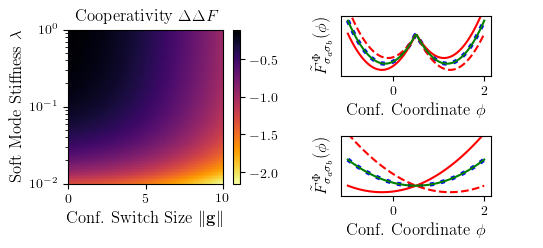

(-1, 5)

In [20]:
## Soft Mode, Added Spring.
β = 1
fa = 1
fb = -1
ua = [0.9, 0.1, 0.1, 0, 0]
ub = [0.9, 0.1, 0.0, 0.1, 0];
λ = 10 .^ LinRange(-2,0,100)
gmag = LinRange(0,10,100)
h = - (fa*ua + fb*ub) / 2;

ddF = coopBi.([h], [ua], [ub], λ', β, fa, fb, gmag)'

function plotter(ax, x, y, z, fs; title="", clbLabel="", 
        vmax=maximum(z), vmin=minimum(z), cmap="inferno_r")
    p = ax.pcolor(x, y, z, cmap=cmap, linewidth=0, 
        rasterized=true, vmax=vmax, vmin=vmin)
    ax.set_ylabel("Soft Mode Stiffness "*L"\lambda", fontsize=fs)
    ax.set_xlabel("Conf. Switch Size "*L"\Vert \mathbf{g} \Vert", fontsize=fs)
    ax.set_yscale("log")
    ax.set_title(title, fontsize=fs)
    clb = fig.colorbar(p, ax=ax)
    ax.set_title(clbLabel, fontsize=fs)
    return clb
end

fs = 12
fig, axs = subplots(1,2,figsize=(6, 2))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
plotter(axs[1,1], gmag, λ, ddF, fs; clbLabel="Cooperativity "*L"\Delta \Delta F")
axs[2].set_axis_off()


function plotLandscapes!(ax, y, U00, U10, U01, U11, fs)
    ax.plot(y, U00, c="b", lw=3, ls=":")
    ax.plot(y, U10, c="r")
    ax.plot(y, U01, c="r", ls="--")
    ax.plot(y, U11, c="g")
    ax.set_xlabel("Conf. Coordinate "*L"\phi", fontsize=fs)
    ax.set_ylabel(L"\tilde{F}^{\Phi}_{\sigma_a \sigma_b}(\phi)", fontsize=fs)
    ax.set_yticks([])
end

left = 0.58
bottom = 0.65
width = 0.25
height = 0.3 
axa = fig.add_axes([left, bottom, width, height])

λ = 10
gmag = 10
U00, U10, U01, U11 = energyAlongConfChangeNegBi(h, ua, ub, λ, β, fa, fb, gmag);
y = LinRange(-1, 2, 100)
plotLandscapes!(axa, y, U00, U10, U01, U11, fs)
axa.set_ylim([-7, 3])

left = 0.58
bottom = 0.05
width = 0.25
height = 0.3
axb = fig.add_axes([left, bottom, width, height])


λ = 0.01
gmag = 0
U00, U10, U01, U11 = energyAlongConfChangeNegBi(h, ua, ub, λ, β, fa, fb, gmag);
y = LinRange(-1, 2, 100)
plotLandscapes!(axb, y, U00, U10, U01, U11, fs)
axb.set_ylim([-1, 5])

fig.savefig("bistable_model_neg.svg", bbox_inches="tight")

## Figure S1.2 Negative cooperativity order-disorder

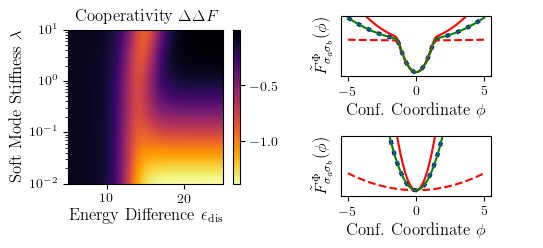

In [13]:
β = 1
ka = 1
kb = -1
ua = [0.0, 0.5, 0.5, 0, 0]
ub = [0.0, 0.5, 0.0, 0.5, 0];

ϵ = LinRange(5, 25, 100)
λ = 10 .^ LinRange(-2,1,100)

ddF = coopNegOD.([ua], [ub], λ', β, ka, kb, ϵ)'

function plotter(ax, x, y, z,fs; title="", clbLabel="", vmax=maximum(z),
        vmin=minimum(z), cmap="inferno")
    p = ax.pcolor(x, y, z, cmap=cmap, linewidth=0, rasterized=true, 
        vmax=vmax, vmin=vmin)
    ax.set_ylabel("Soft Mode Stiffness "*L"\lambda", fontsize=fs)
    ax.set_xlabel("Energy Difference "*L"\epsilon_{\rm dis}", fontsize=fs)
    ax.set_yscale("log")
    ax.set_title(title, fontsize=fs)
    clb = fig.colorbar(p, ax=ax)
    ax.set_title(clbLabel, fontsize=fs)
end

fs = 12
fig, axs = subplots(1,2,figsize=(6, 2))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
plotter(axs[1,1], ϵ, λ, ddF, fs, clbLabel="Cooperativity "*L"\Delta \Delta F",
    cmap="inferno_r")
axs[2].set_axis_off()

function plotLandscapes!(ax, y, U00, U10, U01, U11, fs)
    ax.plot(y, U00, c="b", lw=3, ls=":")
    ax.plot(y, U10, c="r")
    ax.plot(y, U01, c="r", ls="--")
    ax.plot(y, U11, c="g")
    ax.set_xlabel("Conf. Coordinate "*L"\phi", fontsize=fs)
    ax.set_ylabel(L"\tilde{F}^{\Phi}_{\sigma_a \sigma_b}(\phi)", fontsize=fs)
    ax.set_yticks([])
end


left = 0.58
bottom = 0.65
width = 0.25
height = 0.3 
axa = fig.add_axes([left, bottom, width, height])

ϵ = 9
λ = 10
U00, U10, U01, U11 = energyAlongConfCoorNegOD(ua, ub, λ, β, ka, kb, ϵ);
y = LinRange(-5, 5, 100)
plotLandscapes!(axa, y, U00, U10, U01, U11, fs)
axa.set_ylim([-1, 16])

left = 0.58
bottom = 0.05
width = 0.25
height = 0.3
axb = fig.add_axes([left, bottom, width, height])

λ = 0.02
ϵ = 20
U00, U10, U01, U11 = energyAlongConfCoorNegOD(ua, ub, λ, β, ka, kb, ϵ);
y = LinRange(-5, 5, 100)
plotLandscapes!(axb, y, U00, U10, U01, U11, fs)
axb.set_ylim([-0.1, 1])

fig.savefig("order_disorder_model_neg.svg", bbox_inches="tight")